In [58]:
#导入数据及相关包
import pandas as pd #导入pandas
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols #导入经典线性模型包
from sklearn.linear_model import LinearRegression
#导入文件
red=pd.read_csv('./redbook/week2.redbook.csv')

In [59]:
red.head(5)

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [80]:
red.info()
'''
结果显示共有29452行数据，其中gender、age、engaged_last_30三列有缺失值，需要对其进行数据处理
或者用下列代码统计缺失值个数
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   29452 non-null  object 
 2   age                      29452 non-null  float64
 3   engaged_last_30          29452 non-null  object 
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


'\n结果显示共有29452行数据，其中gender、age、engaged_last_30三列有缺失值，需要对其进行数据处理\n或者用下列代码统计缺失值个数\n'

In [79]:
'''
指标解释 
revenue ：用户的下单购买金额
3rd_party_stores： 用户过往在app中从第三方商家购买的数量，0表示购买的自营产品
gender：男1 女0 空缺unkown 
age :年龄 空缺unkown 
engaged_last_30:最近30天在app上有参与重点活动 
lifecycle ：生命周期A：注册6个月内  
B：一年内 
C：两年内  
days_since_last_order 最近一次下单距今的天数（小于1表示当天有下单）
previous_order_amount 累计的用户购买金额  
'''

'\n指标解释 \nrevenue ：用户的下单购买金额\n3rd_party_stores： 用户过往在app中从第三方商家购买的数量，0表示购买的自营产品\ngender：男1 女0 空缺unkown \nage :年龄 空缺unkown \nengaged_last_30:最近30天在app上有参与重点活动 \nlifecycle ：生命周期A：注册6个月内  \nB：一年内 \nC：两年内  \ndays_since_last_order 最近一次下单距今的天数（小于1表示当天有下单）\nprevious_order_amount 累计的用户购买金额  \n'

In [81]:
red.isnull().sum()
#离散程度描述

revenue                    0
gender                     0
age                        0
engaged_last_30            0
lifecycle                  0
 days_since_last_order     0
previous_order_amount      0
3rd_party_stores           0
dtype: int64

In [62]:
red.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [82]:
'''
缺失值处理
对于连续变量，可以用均值、中位数或者根据其他数据模型填充；
对于类别变量，则可以把变量拆解为哑变量，再删除重复或没有意义的变量
将age选择按中位数填充
将性别的缺失值先标记为unknown，再变为哑变量
将engaged缺失值替换为unknown，再变为哑变量
'''
red['age']=red['age'].fillna(red['age'].median())#将age的缺失值用中位数填充
red['gender']=red['gender'].fillna('Unknown')#用unknown填充性别缺失值
red['engaged_last_30']=red['engaged_last_30'].fillna('unknown')
red1=pd.get_dummies(red)#生成哑变量，python会将类别变量转换为哑变量
red1.head()#查看前五行

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_Unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,59.0,4.26,2343.870,0,0,1,0,1,0,0,0,1,0
1,200.99,51.0,0.94,8539.872,0,0,1,0,1,0,0,1,0,0
2,69.98,79.0,4.29,1687.646,1,0,1,0,1,0,0,0,0,1
3,649.99,60.0,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,60.0,21.13,3968.490,4,0,0,1,0,0,1,0,0,1


In [64]:
red['age']=red['age'].fillna(red['age'].median())#将age的缺失值用中位数填充
red['gender']=red['gender'].fillna('Unknown')#用unknown填充性别缺失值
red['engaged_last_30']=red['engaged_last_30'].fillna('unknown')
red1=pd.get_dummies(red)#生成哑变量，python会将类别变量转换为哑变量
red1.head()#查看前五行

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_Unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,59.0,4.26,2343.870,0,0,1,0,1,0,0,0,1,0
1,200.99,51.0,0.94,8539.872,0,0,1,0,1,0,0,1,0,0
2,69.98,79.0,4.29,1687.646,1,0,1,0,1,0,0,0,0,1
3,649.99,60.0,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,60.0,21.13,3968.490,4,0,0,1,0,0,1,0,0,1


<AxesSubplot:xlabel='age', ylabel='revenue'>

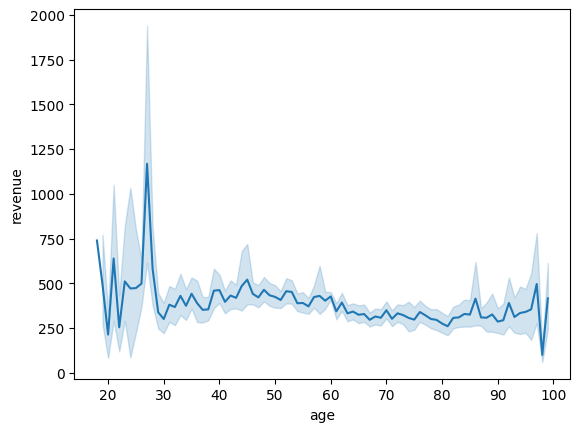

In [83]:
sns.lineplot(x='age',y='revenue',data=red)
#可以看到在销售额在20~30岁之间最高，30岁以后销售额变得平稳一些。

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_order_amount', ylabel='revenue'>

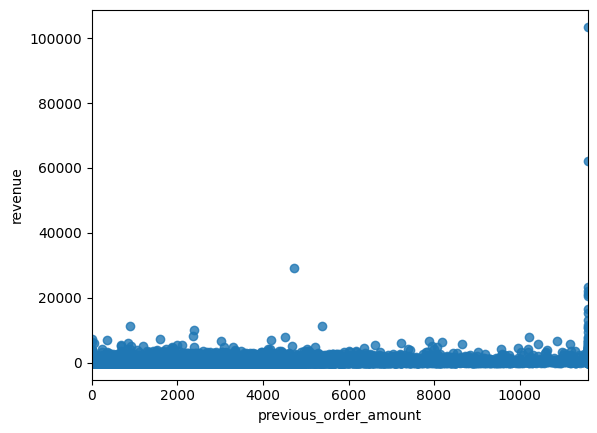

In [66]:
sns.regplot('previous_order_amount','revenue',red)#线性关系可视化

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='revenue'>

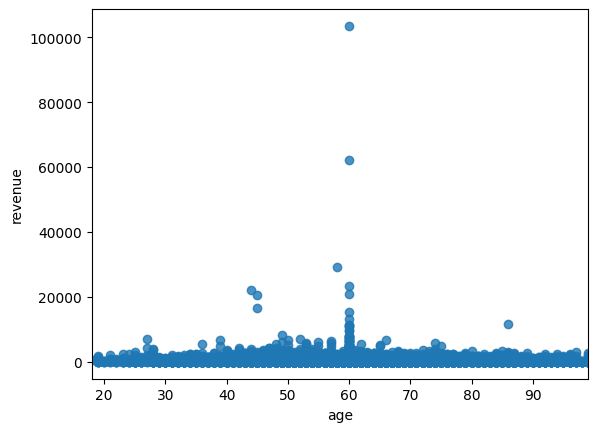

In [67]:
sns.regplot('age','revenue',red)#年龄与销售额的线性关系

In [68]:
'''
从上图看年龄、累计金额似乎不存在线性关系，
但是仔细观察发现有些销售额太高导致关系无法显示，对销售额分区间看看销售额主要集中在哪。
''' 
#将销售额分区间
bins=[0,100,1000,1200,1500,2000,5000,10000,20000,30000]
red1['revenue_level']=pd.cut(red1.revenue,bins,right=False)
red1.groupby('revenue_level').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
revenue_level,,,,,,,,
"[0, 100)",9970.0,56.737771,24.530894,0.02,35.990,57.980,74.9900,99.99
"[100, 1000)",16761.0,369.924863,242.519685,100.00,158.150,289.000,537.9900,999.99
"[1000, 1200)",796.0,1098.275573,59.316398,1000.06,1049.000,1097.300,1149.6200,1199.99
"[1200, 1500)",755.0,1341.604563,88.727190,1200.00,1266.985,1338.940,1415.9600,1499.99
"[1500, 2000)",584.0,1713.847178,142.700321,1500.01,1594.795,1691.110,1827.6725,1999.95
"[2000, 5000)",532.0,2707.051090,657.146959,2000.04,2221.240,2496.435,3015.7075,4970.42
"[5000, 10000)",39.0,6485.890769,1196.145429,5031.49,5545.200,6301.930,7086.7800,9983.28
"[10000, 20000)",8.0,12667.082500,2159.356141,10689.11,11256.630,11557.600,13775.4575,16500.00
"[20000, 30000)",5.0,23272.766000,3425.434350,20588.97,21068.170,22214.920,23410.9700,29080.80


In [ ]:
#从数据结果上看，消费额在5000以上的数据就很少了，筛选出销售额在5000以下的数据，再次做出图形。此时可以看到累计销售额与最近一次销售额之间存在正相关关系。

In [69]:
red1.corr()[['revenue']].sort_values('revenue',ascending=False)
#只选择revenue一列与其他变量的相关关系，并且降序排列

,revenue
revenue,1.000000
previous_order_amount,0.168540
engaged_last_30_1.0,0.038287
days_since_last_order,0.036654
gender_Unknown,0.017722
engaged_last_30_unknown,0.017722
lifecycle_A,0.013683
lifecycle_C,-0.002221
lifecycle_B,-0.008651
gender_1.0,-0.012422


<AxesSubplot:>

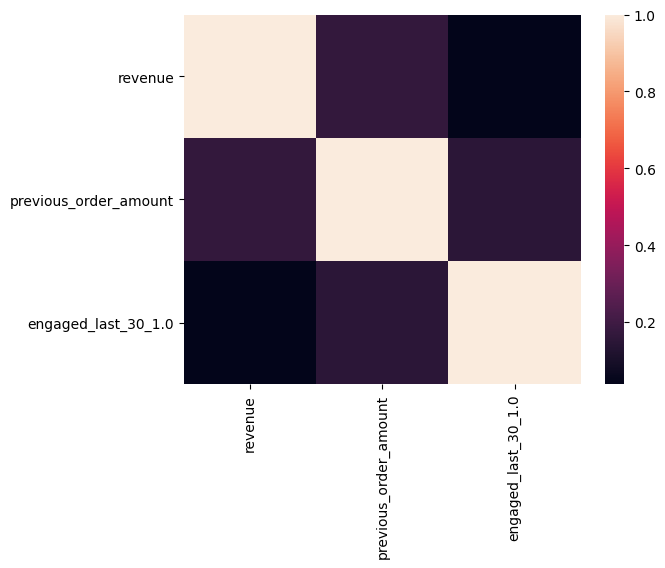

In [70]:
#各变量与销售额的相关系都比较弱，相关关系最强
# 的是previous_order_amount,其他变量与销售额几乎不存在相关性，选取前两个变量做热力图
q=['revenue','previous_order_amount','engaged_last_30_1.0']
sns.heatmap(red1[q].corr())

In [71]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=red1['revenue']
x=red1[['previous_order_amount']]
model.fit(x,y)#模型拟合

LinearRegression()

In [72]:
model.coef_#查看系数估计值

array([0.06800681])

In [73]:
model.intercept_#查看截距项

238.54650492085563

In [74]:
#模型评分
score=model.score(x,y)
#计算y的预测值
predictions=model.predict(x)
#计算误差
error=predictions-y
#计算rmse（均方误差）
rmse=(error**2).mean()**0.5
#计算mae（平均绝对误差）
mae=abs(error).mean()
print(rmse)
print(mae)
487.72743388034957
329.7626459083234


946.4990744073583
356.9227080769087


329.7626459083234

In [75]:
from statsmodels.formula.api import ols#可得到标准线性回归结果
model=ols('y~x',red1).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     861.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.43e-186
Time:                        10:19:15   Log-Likelihood:            -2.4362e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29450   BIC:                         4.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    238.5465      7.750     30.782      0.0

In [76]:
y=red1['revenue']
x=red1[['previous_order_amount','engaged_last_30_1.0','gender_Unknown']]
model1=ols('y~x',red1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     303.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.39e-194
Time:                        10:19:15   Log-Likelihood:            -2.4359e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29448   BIC:                         4.872e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.6504      9.330     21.828      0.0

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=red1['revenue']
x=red1[['previous_order_amount','engaged_last_30_1.0','gender_Unknown']]
model.fit(x,y)
#模型评分
score=model.score(x,y)
#计算y的预测值
predictions=model.predict(x)
#计算误差
error=predictions-y
#计算rmse
rmse=(error**2).mean()**0.5
#计算mae
mae=abs(error).mean()
print(rmse)
print(mae)

945.7252024320377
355.89392768217226
